In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading data

### Genres of items, occupations of users

In [51]:
occups=pd.read_csv("ml-100k/u.occupation",sep="|",header=-1,encoding="latin-1")
print(len(occups))
occups.T

21


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer


In [52]:
genres=pd.read_csv("ml-100k/u.genre",sep="|",index_col=1,header=-1)
print(len(genres))
genres=genres[0]
genres


19


1
0         unknown
1          Action
2       Adventure
3       Animation
4      Children's
5          Comedy
6           Crime
7     Documentary
8           Drama
9         Fantasy
10      Film-Noir
11         Horror
12        Musical
13        Mystery
14        Romance
15         Sci-Fi
16       Thriller
17            War
18        Western
Name: 0, dtype: object

### Users

In [53]:
cols_users=("age","sex","occup","?")
users=pd.read_csv("ml-100k/u.user",sep="|",header=-1,index_col=0,names=cols_users)
print(len(users))
users.head()

943


,age,sex,occup,?
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


### Items

In [54]:
#give name to the columns
cols=["name","date","?","link"]
cols.extend(list(genres))
#cols

In [55]:
items=pd.read_csv("ml-100k/u.item",sep="|",header=-1,index_col=0,encoding="latin-1", names=cols)
print(len(items))
items

1682


,name,date,?,link,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Ratings (Training set)

In [56]:
train1=pd.read_csv("ml-100k/u1.base",sep="\t",header=-1,encoding="latin-1",names=("user","item","rating","time"),
                  # parse_dates=[3,],date_parser=datetime.fromtimestamp
                  )
train1.head()

#import sys
#sys.getsizeof(train1)
print(train1.rating.unique())
train1.describe()

[5 3 4 1 2]


,user,item,rating,time
count,80000.00000,80000.000000,80000.000000,8.000000e+04
mean,525.16570,425.705200,3.528350,8.835645e+08
std,255.94956,331.383936,1.118565,5.318611e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,334.00000,175.000000,3.000000,8.794556e+08
50%,535.00000,321.000000,4.000000,8.828441e+08
75%,744.00000,631.000000,4.000000,8.882676e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [57]:
train1.head()

,user,item,rating,time
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


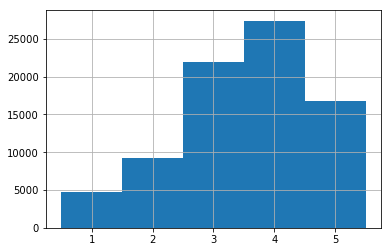

In [58]:
bins=[0.5,1.5,2.5,3.5,4.5,5.5]
train1.rating.hist(bins=bins);

In [59]:
df=train1

### Average per user and item
I also append the average and the number of ratings to user and item dfs

In [60]:
avg_rat_item=df.groupby("item").rating.mean()
n_rat_item=df.groupby("item").rating.count()
avg=df.rating.mean()

##this is wrong, as it includes non-zero elements
#avg_rat_item=np.array(user_item.mean(axis=0))[0,:]
#avg_rat_user=np.array(user_item.mean(axis=1))[:,0]
#users["n_ratings"]=[len(r) for r in user_item.tolil().rows]
#items["n_ratings"]=[len(r) for r in user_item.T.tolil().rows]

items["avg_rating"]=avg_rat_item
items["avg_rating-avg"]=avg_rat_item-avg
items["n_ratings"]=n_rat_item
items["total_rating"]=df.groupby("item").rating.sum()

print(items.n_ratings.sum())  #sanity check
items.sort_values(by="avg_rating",ascending=False)[["name","avg_rating","avg_rating-avg", "n_ratings"]]

80000.0


,name,avg_rating,avg_rating-avg,n_ratings
1189,Prefontaine (1997),5.000000,1.471650,2.0
1653,Entertaining Angels: The Dorothy Day Story (1996),5.000000,1.471650,1.0
1599,Someone Else's America (1995),5.000000,1.471650,1.0
1500,Santa with Muscles (1996),5.000000,1.471650,1.0
1467,"Saint of Fort Washington, The (1993)",5.000000,1.471650,2.0
1201,Marlene Dietrich: Shadow and Light (1996),5.000000,1.471650,1.0
1122,They Made Me a Criminal (1939),5.000000,1.471650,1.0
1293,Star Kid (1997),5.000000,1.471650,3.0
1449,Pather Panchali (1955),4.714286,1.185936,7.0
1367,Faust (1994),4.666667,1.138317,3.0


I now introduce the equivalent of upvotes-downvotes for the 5 star system, in two variants.
In the first one, score_04, I make the equivalence:
    - 1 -> 0
    - 2 -> 0.25
    - 3 -> 0.5
    - 4 -> 0.75
    - 5 -> 1
and I find, apart from a factor, n_ratings*(avg_rating-3).

In the second one, score_15, I make the equivalence:
    - 1 -> 0.2
    - 2 -> 0.4
    - 3 -> 0.6
    - 4 -> 0.8
    - 5 -> 1
and I find, apart from a factor, n_ratings*(avg_rating-2.5).

With score_04, a positive rating is above 3, with score_15, above 2.5   

They give similar results. I will keep the more conservative score_15.
This has the advantage that the equivalent of the total number of upvotes is simply the total rating=avg_rating*n_ratings
 

In [61]:
items["score_04"]=(items["avg_rating"]-3.0)*items["n_ratings"]
items["score_15"]=(items["avg_rating"]-2.5)*items["n_ratings"]
items.sort_values(by="score_04",ascending=False)[["name","avg_rating","avg_rating-avg", "n_ratings","score_04","score_15"]].head(5)

,name,avg_rating,avg_rating-avg,n_ratings,score_04,score_15
50,Star Wars (1977),4.359504,0.831154,484.0,658.0,900.0
100,Fargo (1996),4.108861,0.580511,395.0,438.0,635.5
174,Raiders of the Lost Ark (1981),4.247093,0.718743,344.0,429.0,601.0
127,"Godfather, The (1972)",4.258824,0.730474,340.0,428.0,598.0
181,Return of the Jedi (1983),4.011848,0.483498,422.0,427.0,638.0


In [62]:
items.sort_values(by="score_15",ascending=False)[["name","avg_rating","avg_rating-avg", "n_ratings","score_04","score_15"]].head(5)

,name,avg_rating,avg_rating-avg,n_ratings,score_04,score_15
50,Star Wars (1977),4.359504,0.831154,484.0,658.0,900.0
181,Return of the Jedi (1983),4.011848,0.483498,422.0,427.0,638.0
100,Fargo (1996),4.108861,0.580511,395.0,438.0,635.5
174,Raiders of the Lost Ark (1981),4.247093,0.718743,344.0,429.0,601.0
127,"Godfather, The (1972)",4.258824,0.730474,340.0,428.0,598.0


Now I do the average per user

In [63]:
avg_rat_user=df.groupby("user").rating.mean()
n_rat_user=df.groupby("user").rating.count()

users["avg_rating"]=avg_rat_user
users["avg_rating-avg"]=avg_rat_user-avg 
users["n_ratings"]=n_rat_user

print(users.n_ratings.sum())  #sanity check
users.sort_values(by="avg_rating",ascending=False)

80000


,age,sex,occup,?,avg_rating,avg_rating-avg,n_ratings
849,15,F,student,25652,4.869565,1.341215,23
688,37,F,administrator,60476,4.833333,1.304983,24
225,51,F,administrator,58202,4.800000,1.271650,15
507,18,F,writer,28450,4.724138,1.195788,58
628,13,M,none,94306,4.703704,1.175354,27
928,21,M,student,55408,4.687500,1.159150,32
118,21,M,administrator,90210,4.642857,1.114507,42
427,51,M,doctor,85258,4.583333,1.054983,24
907,25,F,other,80526,4.571429,1.043079,147
686,32,M,educator,26506,4.563380,1.035030,71


### Read test set

In [64]:
test1=pd.read_csv("ml-100k/u1.test",sep="\t",header=-1,encoding="latin-1",names=("user","item","rating","time"),
                  # parse_dates=[3,],date_parser=datetime.fromtimestamp
                  )

avg_test=test1.rating.mean()
print(avg_test)
test1.head()

3.5359


,user,item,rating,time
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198


In [65]:
df_test=test1

# Recommendation

## 1st strategy: recommend best overall items for everyone
Here I just find the movies with the highest average rating, and recommend them to everyone.

First I find the best movies

### (1a) Just rank by average rating

In [66]:
#The best n_items_rec movies
n_items_rec=10
rec_items_a=items.sort_values(by="avg_rating",ascending=False)[:n_items_rec]
rec_items_index_a=rec_items_a.index
#print(rec_items_index_a)
items.loc[rec_items_index_a][["name", "avg_rating", "n_ratings"]]

,name,avg_rating,n_ratings
1189,Prefontaine (1997),5.000000,2.0
1653,Entertaining Angels: The Dorothy Day Story (1996),5.000000,1.0
1599,Someone Else's America (1995),5.000000,1.0
1500,Santa with Muscles (1996),5.000000,1.0
1467,"Saint of Fort Washington, The (1993)",5.000000,2.0
1201,Marlene Dietrich: Shadow and Light (1996),5.000000,1.0
1122,They Made Me a Criminal (1939),5.000000,1.0
1293,Star Kid (1997),5.000000,3.0
1449,Pather Panchali (1955),4.714286,7.0
1367,Faust (1994),4.666667,3.0


These are obscure movies which got 5 by one or two users.

Let's try recommending the first 10 items of this list to the users.

In [67]:
#Example: The average rating with n_items_rec=10 suggestions per user
#here I find the recommended items in the test set
test_rec_a=df_test[df_test["item"].isin(rec_items_index_a)]
print(len(df_test),len(test_rec_a))
print("number of recommended items per users= ",n_items_rec)
print("number of suggested items= ",n_items_rec*len(users))
print("mean for the successful suggested items= ",test_rec_a.rating.mean())
print("number of successful suggested items= ",test_rec_a.rating.count())
print("number of successful suggested items per user = ",test_rec_a.rating.count()/len(users))

20000 5
number of recommended items per users=  10
number of suggested items=  9430
mean for the successful suggested items=  4.2
number of successful suggested items=  5
number of successful suggested items per user =  0.00530222693531


The average rating is good, but I only got 5 successful recommendations out of 9430, so it is probably not a good strategy

### ... Bayesian Ranking

Let's apply a Bayesian ranking model to the rating system ( "Bayesian methods for hackers", p. 122).
This should be better than ranking by average rating, since it penalizes items with few ratings.

It calculates the 95th percentile of the posterior probability distribution, starting from a flat prior (all ratings 1 2 3 4 5 equally probable).

Since we know that the posterior is a beta function, it is possible to compute this ranking analytically (this is done with a Gaussian approximation; see book for details).

In [68]:

def pct95_ab(a,b):
    """bayesian methods for hackers, p. 122"""
    return a/(a+b)-1.65*np.sqrt(a*b/((a+b)**2*(a+b+1)))

def pct95_SN_04(S,N):
    """here I consider 1->0 2->0.25 3->0.5 4->0.75 1->1"""
    s=S/N
    #u=s/5*N
    u=(s-1)/4*N
    a=1+u
    b=1+N-u
    return pct95_ab(a,b)

def pct95_SN_15(S,N):
    """here I consider 1->0.2 2->0.4 3->0.6 4->0.8 1->1"""
    s=S/N
    u=s/5*N
    a=1+u
    b=1+N-u
    return pct95_ab(a,b)

In [69]:
items['bayes95_04'] = items[['total_rating','n_ratings']].apply(lambda x: pct95_SN_04(*x), axis=1)
items['bayes95_15'] = items[['total_rating','n_ratings']].apply(lambda x: pct95_SN_15(*x), axis=1)

In [70]:
items[["name","total_rating","n_ratings","avg_rating","bayes95_04","bayes95_15"]].sort_values(by="bayes95_04",ascending=False)

,name,total_rating,n_ratings,avg_rating,bayes95_04,bayes95_15
318,Schindler's List (1993),1064.0,237.0,4.489451,0.833340,0.861850
408,"Close Shave, A (1995)",424.0,93.0,4.559140,0.827167,0.853354
169,"Wrong Trousers, The (1993)",439.0,97.0,4.525773,0.818933,0.846810
483,Casablanca (1942),866.0,195.0,4.441026,0.815501,0.846751
64,"Shawshank Redemption, The (1994)",985.0,223.0,4.417040,0.812040,0.844333
50,Star Wars (1977),2110.0,484.0,4.359504,0.810962,0.845256
12,"Usual Suspects, The (1995)",928.0,211.0,4.398104,0.805559,0.838890
603,Rear Window (1954),754.0,173.0,4.358382,0.789630,0.825252
98,"Silence of the Lambs, The (1991)",1286.0,300.0,4.286667,0.783083,0.821588
313,Titanic (1997),1186.0,277.0,4.281588,0.780062,0.818922


Under this approach, the overall best movie is "Schindler's List".

Let's try recommending:

In [71]:
#Example: The average rating with n_items_rec=10 suggestions per user
#here I find the recommended items in the test set
#The best n_items_rec movies
n_items_rec=10
rec_items_a=items.sort_values(by="bayes95_04",ascending=False)[:n_items_rec]
rec_items_index_a=rec_items_a.index
#print(rec_items_index_a)
items.loc[rec_items_index_a][["name", "avg_rating", "n_ratings"]]
test_rec_a=df_test[df_test["item"].isin(rec_items_index_a)]
print(len(df_test),len(test_rec_a))
print("number of recommended items per users= ",n_items_rec)
print("number of suggested items= ",n_items_rec*len(users))
print("mean for the successful suggested items= ",test_rec_a.rating.mean())
print("number of successful suggested items= ",test_rec_a.rating.count())
print("number of successful suggested items per user = ",test_rec_a.rating.count()/len(users))

20000 563
number of recommended items per users=  10
number of suggested items=  9430
mean for the successful suggested items=  4.3481349911190055
number of successful suggested items=  563
number of successful suggested items per user =  0.597030752916


So we get a larger average rating (4.35 vs 4.2), and many more successful suggestions (0.6 vs 0.005 per user). 

So let's keep this approach if we want the highest average rating

### (1b) Rank by most viewed
Let's try with the most viewed movies.

In [72]:
n_items_rec=10
rec_items_b=items.sort_values(by="n_ratings",ascending=False)[:n_items_rec]
rec_items_index_b=rec_items_b.index
#print(rec_items_index_b)
items.loc[rec_items_index_b][["name", "avg_rating","avg_rating-avg" ,"n_ratings"]]

,name,avg_rating,avg_rating-avg,n_ratings
50,Star Wars (1977),4.359504,0.831154,484.0
181,Return of the Jedi (1983),4.011848,0.483498,422.0
258,Contact (1997),3.823383,0.295033,402.0
100,Fargo (1996),4.108861,0.580511,395.0
294,Liar Liar (1997),3.164975,-0.363375,394.0
288,Scream (1996),3.445013,-0.083337,391.0
286,"English Patient, The (1996)",3.641753,0.113403,388.0
1,Toy Story (1995),3.892950,0.364600,383.0
121,Independence Day (ID4) (1996),3.390935,-0.137415,353.0
300,Air Force One (1997),3.656250,0.127900,352.0


These are well-known movies, even though some have below-par ratings (Liar Liar, Scream, ID) 

In [73]:
test_rec_b=df_test[df_test["item"].isin(rec_items_index_b)]
print(len(df_test),len(test_rec_b))
print("number of recommended items per users= ",n_items_rec)
print("number of suggested items= ",n_items_rec*len(users))
print("mean for the successful suggested items= ",test_rec_b.rating.mean())
print("number of successful suggested items= ",test_rec_b.rating.count())
print("number of successful suggested items per user = ",test_rec_b.rating.count()/len(users))

20000 899
number of recommended items per users=  10
number of suggested items=  9430
mean for the successful suggested items=  3.7853170189099
number of successful suggested items=  899
number of successful suggested items per user =  0.953340402969


Here I get an average of almost 1 useful recommendation per user, but with a lower average rating than before.

### (1c) Rank by total rating
Here I take total_rating as the sum of all ratings. It is a comprimise between quantity and quality

In [74]:
n_items_rec=10
rec_items_c=items.sort_values(by="total_rating",ascending=False)[:n_items_rec]
rec_items_index_c=rec_items_c.index
#print(rec_items_index_b)
items.loc[rec_items_index_c][["name", "avg_rating","avg_rating-avg" ,"n_ratings","total_rating"]]

,name,avg_rating,avg_rating-avg,n_ratings,total_rating
50,Star Wars (1977),4.359504,0.831154,484.0,2110.0
181,Return of the Jedi (1983),4.011848,0.483498,422.0,1693.0
100,Fargo (1996),4.108861,0.580511,395.0,1623.0
258,Contact (1997),3.823383,0.295033,402.0,1537.0
1,Toy Story (1995),3.892950,0.364600,383.0,1491.0
174,Raiders of the Lost Ark (1981),4.247093,0.718743,344.0,1461.0
127,"Godfather, The (1972)",4.258824,0.730474,340.0,1448.0
286,"English Patient, The (1996)",3.641753,0.113403,388.0,1413.0
288,Scream (1996),3.445013,-0.083337,391.0,1347.0
300,Air Force One (1997),3.656250,0.127900,352.0,1287.0


Here I get popular movies with good ratings, even though Scream, which is slightly below-par, is still in the top 10.

In [75]:
test_rec_c=df_test[df_test["item"].isin(rec_items_index_c)]
print(len(df_test),len(test_rec_c))
print("number of recommended items per users= ",n_items_rec)
print("number of suggested items= ",n_items_rec*len(users))
print("mean for the successful suggested items= ",test_rec_c.rating.mean())
print("number of successful suggested items= ",test_rec_c.rating.count())
print("number of successful suggested items per user = ",test_rec_c.rating.count()/len(users))

20000 881
number of recommended items per users=  10
number of suggested items=  9430
mean for the successful suggested items=  3.9580022701475595
number of successful suggested items=  881
number of successful suggested items per user =  0.934252386002


So we have slightly less successful recommendations (0.93 vs 0.95 per user), but with a somewhat higher average rating (3.96 vs 3.79)

### (1d) Rank by total ranking - avg_rating
I think another good KPI could be how many users like a movie more than the average.

So: (avg_ranking(item)-avg_ranking(all items)) * n_rankings(item)

Once again, it is a comprimise between quantity and quality, but with a stress on quality.

In [76]:
items["total_rating-avg"]=items["avg_rating-avg"]*items["n_ratings"]
#items.sort_values(by="tot_rating-avg",ascending=False)[["name","avg_rating","n_ratings","tot_rating-avg" ]]

In [77]:
n_items_rec=10
rec_items_d=items.sort_values(by="total_rating-avg",ascending=False)[:n_items_rec]
rec_items_index_d=rec_items_d.index
#print(rec_items_index_b)
items.loc[rec_items_index_d][["name", "avg_rating","avg_rating-avg" ,"n_ratings","total_rating","total_rating-avg"]]

,name,avg_rating,avg_rating-avg,n_ratings,total_rating,total_rating-avg
50,Star Wars (1977),4.359504,0.831154,484.0,2110.0,402.27860
127,"Godfather, The (1972)",4.258824,0.730474,340.0,1448.0,248.36100
174,Raiders of the Lost Ark (1981),4.247093,0.718743,344.0,1461.0,247.24760
100,Fargo (1996),4.108861,0.580511,395.0,1623.0,229.30175
318,Schindler's List (1993),4.489451,0.961101,237.0,1064.0,227.78105
98,"Silence of the Lambs, The (1991)",4.286667,0.758317,300.0,1286.0,227.49500
313,Titanic (1997),4.281588,0.753238,277.0,1186.0,208.64705
181,Return of the Jedi (1983),4.011848,0.483498,422.0,1693.0,204.03630
64,"Shawshank Redemption, The (1994)",4.417040,0.888690,223.0,985.0,198.17795
172,"Empire Strikes Back, The (1980)",4.196610,0.668260,295.0,1238.0,197.13675


This way I get reasonable results for the best movies. Star Wars has really an edge here, thanks to good rating (not the highest one, though) and a lot of views. 

Schindler's List, for example, has in principle a higher rating (it is first in the bayesian ranking for best average score), but less views, so it is well behind.

By construction, we do not have items below-par in the top items.

On the opposite, this way we penalize popular items below par, which end up at the end of the list):

In [78]:
items[["name", "avg_rating","avg_rating-avg" ,"n_ratings","total_rating","total_rating-avg"]].sort_values(by="total_rating-avg",ascending=False).dropna().tail(10)

,name,avg_rating,avg_rating-avg,n_ratings,total_rating,total_rating-avg
231,Batman Returns (1992),2.666667,-0.861683,114.0,304.0,-98.23190
259,George of the Jungle (1997),2.766917,-0.761433,133.0,368.0,-101.27055
748,"Saint, The (1997)",3.121094,-0.407256,256.0,799.0,-104.25760
323,Dante's Peak (1997),3.000000,-0.528350,199.0,597.0,-105.14165
243,Jungle2Jungle (1997),2.490741,-1.037609,108.0,269.0,-112.06180
289,Evita (1996),2.961905,-0.566445,210.0,622.0,-118.95350
358,Spawn (1997),2.610687,-0.917663,131.0,342.0,-120.21385
235,Mars Attacks! (1996),2.836158,-0.692192,177.0,502.0,-122.51795
678,Volcano (1997),2.847826,-0.680524,184.0,524.0,-125.21640
294,Liar Liar (1997),3.164975,-0.363375,394.0,1247.0,-143.16990


So we find Liar Liar at the bottom, while it was in the top 10 with the total number of views.

Let's try recommending:

In [79]:
test_rec_d=df_test[df_test["item"].isin(rec_items_index_d)]
print(len(df_test),len(test_rec_d))
print("number of recommended items per users= ",n_items_rec)
print("number of suggested it§ems= ",n_items_rec*len(users))
print("mean for the successful suggested items= ",test_rec_d.rating.mean())
print("number of successful suggested items= ",test_rec_d.rating.count())
print("number of successful suggested items per user = ",test_rec_d.rating.count()/len(users))

20000 802
number of recommended items per users=  10
number of suggested it§ems=  9430
mean for the successful suggested items=  4.28428927680798
number of successful suggested items=  802
number of successful suggested items per user =  0.850477200424


Now the number of successful recommendations has dropped to 0.85 vs 0.93 per user, but the average rating has increased  from 3.96 to 4.28.

It all depends on how you want to define a good movie, so how you define your KPI (key performance indicator).

### ... Using the equivalent of (upvotes-downvotes) -> score_15

A more conservative approach is to take score_15, which is n_ratings*(avg_rating-2.5), so even a popular movie slightly below average can be a good choice.

In [80]:
n_items_rec=10
rec_items_d=items.sort_values(by="score_15",ascending=False)[:n_items_rec]
rec_items_index_d=rec_items_d.index
#print(rec_items_index_b)
items.loc[rec_items_index_d][["name", "avg_rating","avg_rating-avg" ,"n_ratings","total_rating","total_rating-avg","score_15"]]

,name,avg_rating,avg_rating-avg,n_ratings,total_rating,total_rating-avg,score_15
50,Star Wars (1977),4.359504,0.831154,484.0,2110.0,402.27860,900.0
181,Return of the Jedi (1983),4.011848,0.483498,422.0,1693.0,204.03630,638.0
100,Fargo (1996),4.108861,0.580511,395.0,1623.0,229.30175,635.5
174,Raiders of the Lost Ark (1981),4.247093,0.718743,344.0,1461.0,247.24760,601.0
127,"Godfather, The (1972)",4.258824,0.730474,340.0,1448.0,248.36100,598.0
98,"Silence of the Lambs, The (1991)",4.286667,0.758317,300.0,1286.0,227.49500,536.0
1,Toy Story (1995),3.892950,0.364600,383.0,1491.0,139.64195,533.5
258,Contact (1997),3.823383,0.295033,402.0,1537.0,118.60330,532.0
172,"Empire Strikes Back, The (1980)",4.196610,0.668260,295.0,1238.0,197.13675,500.5
313,Titanic (1997),4.281588,0.753238,277.0,1186.0,208.64705,493.5


In [81]:
test_rec_d=df_test[df_test["item"].isin(rec_items_index_d)]
print(len(df_test),len(test_rec_d))
print("number of recommended items per users= ",n_items_rec)
print("number of suggested it§ems= ",n_items_rec*len(users))
print("mean for the successful suggested items= ",test_rec_d.rating.mean())
print("number of successful suggested items= ",test_rec_d.rating.count())
print("number of successful suggested items per user = ",test_rec_d.rating.count()/len(users))

20000 857
number of recommended items per users=  10
number of suggested it§ems=  9430
mean for the successful suggested items=  4.150525087514586
number of successful suggested items=  857
number of successful suggested items per user =  0.908801696713


Now the average score is 4.15, with 0.91 successful recommendations per user, a good compromise between quality and quantity.

As a comparison, score_04=n_ratings*(avg_Rating-3) gives 4.22 and 0.86:

In [82]:
rec_items_d=items.sort_values(by="score_04",ascending=False)[:n_items_rec]
rec_items_index_d=rec_items_d.index
test_rec_d=df_test[df_test["item"].isin(rec_items_index_d)]
print(len(df_test),len(test_rec_d))
print("number of recommended items per users= ",n_items_rec)
print("number of suggested it§ems= ",n_items_rec*len(users))
print("mean for the successful suggested items= ",test_rec_d.rating.mean())
print("number of successful suggested items= ",test_rec_d.rating.count())
print("number of successful suggested items per user = ",test_rec_d.rating.count()/len(users))

20000 811
number of recommended items per users=  10
number of suggested it§ems=  9430
mean for the successful suggested items=  4.2231812577065355
number of successful suggested items=  811
number of successful suggested items per user =  0.860021208908


### (1a-1b-1c-1d) Plots
Let's do some plots to compare the different strategies.

For each strategy I change the number of recommended items per user, from 1 to a given maximum items_max, and collect the 4 KPIs as a function of this number; I also compare train/test.

In [83]:
rec_items_list=(1,3,5,10,20,30,40,50)
strategies=["bayes95_04","n_ratings","total_rating","score_15"]
kpi=["k_avg_rating","k_n_ratings","k_total_rating","k_score_15"]
data_sets=["df_train","df_test"]

Here I define a macro to validate a given strategy

In [85]:
def validate_strategy(f_user_item,verbose=False,rec_items_list=rec_items_list,data_sets=data_sets,df=df,df_test=df_test):
    """Requires f_user_item: a fct that, given the index of user, returns the ordered index list of suggested items.
    Returns a df which contains the score for train and test sets as a fct of the number of recommended items
    It removes items already present in df_train."""
    sd=[(s,d) for s in ["sum","count"] for d in data_sets]
    index = pd.MultiIndex.from_tuples(sd, names=["operation",'Train/Test'])
    output_df=pd.DataFrame(index=rec_items_list,columns=index,data=0)
    for u in users.index:
        #fct that gives sorted items
        items_sorted_index= f_user_item(u)
        #subset of df with given user
        df_user_train=df[df["user"]==u]
        df_user_test= df_test[df_test["user"]==u]
        #items already seen by user
        already_seen_train=set(df_user_train.item)                        
        already_seen_test= set(df_user_test.item)                       
        #removes items already seen by user
        user_list_of_item_test= [i for i in items_sorted_index if i not in already_seen_train]  #suggested items not already seen
        user_list_of_item_train=[i for i in items_sorted_index if i not in already_seen_test]  #suggested items not already seen
        if(verbose): print(u, items.loc[user_list_of_item_test[0]]["name"])   #I print the best item for each user
        
        for n in rec_items_list:                               #number of items to recommend
            #print("N.Items",i)
            rec_items_index_i_test=  user_list_of_item_test[:n]   #get their index                  
            rec_items_index_i_train= user_list_of_item_train[:n]               

            for d in data_sets:                            #the train/test datasets
                if (d=="df_test"):
                        rec =df_user_test[df_user_test["item"].isin(rec_items_index_i_test)]    #find them in the test set
                        output_df.loc[n,("sum",d)]+=rec.rating.sum()
                        output_df.loc[n,("count",d)]+=rec.rating.count()
                        #print(d)
                if (d=="df_train"):   
                        rec=df_user_train[df_user_train["item"].isin(rec_items_index_i_train)]              #find them also in the train set 
                        output_df.loc[n,("sum",d)]+=rec.rating.sum()
                        output_df.loc[n,("count",d)]+=rec.rating.count()
                       

               # output_df.loc[n,d]+=rec.rating.sum() #/length
        #print(output_df)

    #at the end I normalize to compare train and test   
    output_df[("sum","df_train")]/=len(df)
    output_df[("count","df_train")]/=len(df)
    output_df[("sum","df_test")]/=len(df_test) ;
    output_df[("count","df_test")]/=len(df_test) ;
    return output_df

In [ ]:
def strategy_0(u,order_by="total_rating"):
    """User-independent sorting, just by global ratings"""
    items_sorted=items.sort_values(by=order_by,ascending=False).index   #sort items by strategy 
    return list(items_sorted)

In [ ]:
strategies=["bayes95_04","n_ratings","total_rating","score_15"]
strategies_0={}
for s in strategies:
    print(s)
    strategies_0[s]=validate_strategy(lambda x:strategy_0(x,s))


In [ ]:
#nsd=[(n,s,d) for n in rec_items_list for s in strategies for d in data_sets]
#nsdk=[(n,s,d,k) for n in rec_items_list for s in strategies for d in data_sets for k in kpi]
#index = pd.MultiIndex.from_tuples(nsd, names=["n_items",'Strategy','Train/Test'])
#index = pd.MultiIndex.from_tuples(nsdk, names=["n_items",'Strategy','Train/Test','kpi'])
index = pd.MultiIndex.from_product( [rec_items_list, strategies, data_sets,kpi], 
                                       names=["n_items",'Strategy','Train/Test','KPI'])
strategy_df=pd.DataFrame(index=index,columns=["value"])
for n in rec_items_list:
    for s in strategies:
        for d in data_sets:
            strategy_df.loc[(n,s,d,"k_avg_rating")]=strategies_0[s].loc[n,("sum",d)]/strategies_0[s].loc[n,("count",d)]
            strategy_df.loc[(n,s,d,"k_n_ratings")]=strategies_0[s].loc[n,("count",d)]
            strategy_df.loc[(n,s,d,"k_total_rating")]=strategies_0[s].loc[n,("sum",d)]
            strategy_df.loc[(n,s,d,"k_score_15")]=strategies_0[s].loc[n,("sum",d)]-2.5*strategies_0[s].loc[n,("count",d)]
strategy_df_ri=strategy_df.reset_index()
strategy_df_ri

In [ ]:
#f, ax = plt.subplots(4,4,figsize=(25,25))
import seaborn
fg = seaborn.factorplot(col="Strategy",row='KPI',hue="Train/Test",y="value",x="n_items", data=strategy_df_ri,
                       style="-",sharey="row",sharex=True) # hue='Mean', 


## 2nd strategy: Suggest similar items to the liked ones (same genre)
This is possible because we know a priori the genre of the movies (this is still non-collaborative).

I need two things:

- the best items per genre;
- the preferred genre(s) of each user.

Then I recommend to each user the most popular movies of his preferred genre(s).

### (2a) Recommendation per preferred genre
List_item_genre is a dictionary of dfs, each with items within a given genre

In [ ]:
dict_item_genre={}
for i,g in enumerate(genres):                #loop over genres
    items_g_df=items[items[g]==1]
    dict_item_genre[g]=items_g_df.sort_values("total_rating",ascending=False)

For example, I can get Action:

In [ ]:
dict_item_genre["Action"].head()

... and all items within are of genre Action.

Now each user gets a score of how much he likes / watches each genre.

I will stick with total_score as KPI.

In [ ]:
df_user_genre=pd.DataFrame(index=users.index,columns=genres)
for i,g in enumerate(genres):                     #loop over genres again
    items_g=list(items[items[g]==1].index)        #list of index of items of selected genre
    print(g)
    for u in users.index:                                 #loop over users
        df_user=df[df["user"]==u]
        df_user_genre.loc[u,g]=df_user[df_user["item"].isin(items_g)]["rating"].sum()

This is the result:

In [ ]:
df_user_genre.head()

Finally, I find the preferred genre of each user and suggest the best movies there

In [ ]:
def strategy_2a(u):
    """Returns the best items for preferred genre of the user"""
    preferred_genre=df_user_genre[genres].loc[u].argmax()
    items_sorted=dict_item_genre[preferred_genre]["total_rating"]         #sorted items in genre  
    return list(items_sorted.index)

In [ ]:
strategy2a_df=validate_strategy(strategy_2a,verbose=True)

In [90]:
strategy1_df=strategies_0["total_rating"]
strategy1_df

NameError: name 'strategies_0' is not defined

In [ ]:
strategy2a_df["sum"]

In [ ]:
f_train, ax_train = plt.subplots(1,2,figsize=(12,6))
strategy2a_df["sum"]["df_train"].plot(ax=ax_train[0],label="best items per preferred genre", style="ro")
strategy1_df["sum"]["df_train"].plot(ax=ax_train[0],label="best items overall",color="k")
ax_train[0].legend();


ax_train[1].plot(rec_items_list,100*(strategy2a_df["sum"]["df_train"]-strategy1_df["sum"]["df_train"])/strategy1_df["sum"]["df_train"],"ro",label="best items per preferred genre")
ax_train[1].legend();
ax_train[1].set_ylabel(r"% change wrt to baseline");
ax_train[1].axhline(0,color="k");

In [ ]:
f_test, ax_test = plt.subplots(1,2,figsize=(12,6))
strategy2a_df["sum"]["df_test"].plot(ax=ax_test[0],label="best items per preferred genre", style="ro")
strategy1_df["sum"]["df_test"].plot(ax=ax_test[0],label="best items overall",color="k")
ax_test[0].legend();

ax_test[1].plot(rec_items_list,100*(strategy2a_df["sum"]["df_test"]-strategy1_df["sum"]["df_test"])/strategy1_df["sum"]["df_test"],"ro",label="best items per preferred genre")
ax_test[1].legend();
ax_test[1].set_ylabel(r"% change wrt to baseline");
ax_test[1].axhline(0,color="k");

We don't really gain much, and we lose for a lot of items, because we reach the end of the list fast.

### (2b) Weighted recommendation preferred genres / best items

Here I normalize the genres for each item so they sum to 1.

In [ ]:
items["sum_genres"]=items[genres].sum(axis=1)
genres_norm=[g+"_norm" for g in genres]
for g in genres:
    items[g+"_norm"]=np.sqrt(items[g]/items["sum_genres"])
items[genres_norm].head()

And I do the same for df_user_genre

In [2]:
df_user_genre["sum_ratings"]=df_user_genre[genres].sum(axis=1)
genres_norm=[g+"_norm" for g in genres]
for g in genres:
    df_user_genre[g+"_norm"]=(df_user_genre[g]/df_user_genre["sum_ratings"])**(0.5)
df_user_genre[genres_norm]

NameError: name 'df_user_genre' is not defined

In [ ]:
#items[genres_norm+["total_rating"]]
df_item_genre=items[genres_norm+["total_rating"]]
#df_user_genre[genres_norm]


In [ ]:
df_item_genre=items[genres_norm]
print(df_item_genre.shape)
print(df_user_genre[genres_norm].shape)

In [ ]:
array_user_item=np.array(df_user_genre[genres_norm]).dot(np.array(df_item_genre).T)
#df_user_genre.shape

This is n_users*n_items large, so should be avoided, but let's do an exception (it should be done user by user, but then it would be slow):

In [ ]:
df_user_item=pd.DataFrame(array_user_item,index=users.index,columns=items.index)
print(df_user_item.min().min())
print(df_user_item.max().max())

It describes how "similar" an item is to one user's likings, according to the item's genre and to the user ratings of previous movies of the same genre

In [ ]:
def strategy_2b(u):
    """how much the preferred genres of the user coincide with the genre of the suggested movie"""
    df_user_item_u=df_user_item.loc[[u,]].T                #overlaps of given user with all items
    df_user_item_u["total_rating"]=items["total_rating"]   #I add the total rating of the items

    df_user_item_u["weighted_rating"]= (df_user_item_u[u])**(1)*df_user_item_u["total_rating"] #I multiply the two
    items_sorted=df_user_item_u.sort_values(by="weighted_rating",ascending=False)
    return items_sorted.index

In [ ]:
strategy2b_df=validate_strategy(strategy_2b,verbose=True)

In [ ]:
strategy2b_df.plot(style="o");

In [ ]:
rec_items_list=strategy2a_df.index


In [ ]:
#train set
strategy2b_df["sum"]["df_train"].plot(ax=ax_train[0],label="best items weighted by personal preferred genre", style="bo")
ax_train[0].legend();
ax_train[1].plot(rec_items_list,100*(strategy2b_df["sum"]["df_train"]-strategy1_df["sum"]["df_train"])/strategy1_df["sum"]["df_train"],"bo",label="best items weighted by personal preferred genre")
ax_train[1].legend();
f_train

In [ ]:
#test set
strategy2b_df["sum"]["df_test"].plot(ax=ax_test[0],label="best items weighted by personal preferred genre", style="bo")
ax_test[0].legend();
ax_test[1].plot(rec_items_list,100*(strategy2b_df["sum"]["df_test"]-strategy1_df["sum"]["df_test"])/strategy1_df["sum"]["df_test"],"bo",label="best items weighted by personal preferred genre")
ax_test[1].legend();
f_test

We gain a little

## 3rd strategy: Liked items from the same user category

In addition to items' genre, we also know the category to which each user belongs. We can use this info to reccomend items from the same group of users.

For each user we have age, sex, occupation.

In [ ]:
users.head()

### (3a) Segment by sex

In [ ]:
users.sex.value_counts().plot(kind='bar');

In [ ]:
df_with_usersgroups=pd.merge(df, users[["age","sex","occup"]], left_on='user', right_index=True)
items_mf=df_with_usersgroups.groupby(["item","sex"]).rating.sum().unstack()
#avg_rat_item=df.groupby("item").rating.mean()
#df
items_mf.head()

In [ ]:
len(items_mf)

In [ ]:
def strategy_3a(u):
    """given u index of user, returns the index of the best items according to his sex"""
    df_user_item_u=items_mf[users.loc[u].sex]
    items_sorted=df_user_item_u.sort_values(ascending=False)
    return items_sorted.index

strategy3a_df=validate_strategy(strategy_3a,verbose=True)
    

In [ ]:
#test set
strategy3a_df["sum"]["df_test"].plot(ax=ax_test[0],label="best items by sex", style="yo")
ax_test[0].legend();
ax_test[1].plot(rec_items_list,100*(strategy3a_df["sum"]["df_test"]-strategy1_df["sum"]["df_test"])/strategy1_df["sum"]["df_test"],"yo",label="best items by sex")
ax_test[1].legend();
f_test

### (3b) by occupation

In [ ]:
users.occup.value_counts().plot(kind='bar');

In [ ]:
items_occup=df_with_usersgroups.groupby(["item","occup"]).rating.sum().unstack()
#avg_rat_item=df.groupby("item").rating.mean()
#df
items_occup.head()

In [ ]:
def strategy_3b(u):
    """given u index of user, returns the index of the best items according to his occup"""
    df_user_item_u=items_occup[users.loc[u].occup]
    items_sorted=df_user_item_u.sort_values(ascending=False)
    return items_sorted.index

strategy3b_df=validate_strategy(strategy_3b,verbose=True)

In [ ]:
strategy3b_df.plot(style="o")

In [ ]:
strategy3b_df["sum"]["df_test"].plot(ax=ax_test[0],label="best items by occupation", style="go")
ax_test[0].legend();
ax_test[1].plot(rec_items_list,100*(strategy3b_df["sum"]["df_test"]-strategy1_df["sum"]["df_test"])/strategy1_df["sum"]["df_test"],"go",label="best items by occupation")
ax_test[1].legend();
f_test


This does not work well, since it overfits. One should probably create groups of similar occupations. 

### (3c) by age

In [ ]:
users.age.plot(kind='hist');

For the moment a define arbitrary bins

In [ ]:
bins=[0,18,25,35,50,100]
users["age_group"]=pd.cut(users.age,bins)
users.age_group.value_counts().plot(kind="bar")

In [ ]:
df_with_usersgroups=pd.merge(df, users[["age","sex","occup","age_group"]], left_on='user', right_index=True)

items_age=df_with_usersgroups.groupby(["item","age_group"]).rating.sum().unstack()
#avg_rat_item=df.groupby("item").rating.mean()
#df
items_age.head()

In [ ]:
def strategy_3c(u):
    """given u index of user, returns the index of the best items according to his occup"""
    df_user_item_u=items_age[users.loc[u].age_group]
    items_sorted=df_user_item_u.sort_values(ascending=False)
    return items_sorted.index

strategy3c_df=validate_strategy(strategy_3c,verbose=True)

In [ ]:
strategy3c_df["sum"]["df_test"].plot(ax=ax_test[0],label="best items by age", style="co")
ax_test[0].legend();
ax_test[1].plot(rec_items_list,100*(strategy3c_df["sum"]["df_test"]-strategy1_df["sum"]["df_test"])/strategy1_df["sum"]["df_test"],"co",label="best items by age")
ax_test[1].legend();
f_test

Small increase, similar to sex

### (3d) by sex and age

In [ ]:
items_age_sex=df_with_usersgroups.groupby(["item","age_group","sex"]).rating.sum().unstack().unstack()
#avg_rat_item=df.groupby("item").rating.mean()
#df
items_age_sex.head()

In [ ]:
def strategy_3d(u):
    """given u index of user, returns the index of the best items according to his age/sex"""
    df_user_item_u=items_age_sex[users.loc[u].sex][users.loc[u].age_group]
    items_sorted=df_user_item_u.sort_values(ascending=False)
    return items_sorted.index

strategy3d_df=validate_strategy(strategy_3d,verbose=True)

In [ ]:
strategy3d_df.plot(style="o")

In [ ]:
strategy3d_df["sum"]["df_test"].plot(ax=ax_test[0],label="best items by age/sex", style="mo")
ax_test[0].legend();
ax_test[1].plot(rec_items_list,100*(strategy3d_df["sum"]["df_test"]-strategy1_df["sum"]["df_test"])/strategy1_df["sum"]["df_test"],"mo",label="best items by age/sex")
ax_test[1].legend();
f_test

This probably overfits a bit, since it is worse than age only.

## 4th Strategy: Collaborative filtering

### Build sparse matrix with ratings, dim=users * items

In [37]:
import scipy.sparse

#these are the ratings, read as a sparse matrix, with index starting from zero, hence the -1
user_item=scipy.sparse.coo_matrix((np.array(df["rating"]),(np.array(df["user"]-1),np.array(df["item"]-1))))

#these are if there is a rating
#user_item_n=scipy.sparse.coo_matrix((np.ones(len(df)),(np.array(df["user"]-1),np.array(df["item"]-1))))

print(user_item.getnnz())
print(user_item.count_nonzero())
#print(user_item_n.count_nonzero())
print(user_item.shape)
#print(user_item_n.shape)

80000
80000
(943, 1682)


I normalize user_item so that the overlap of a user with himself is 1 (the overlap of an item with itself will not be 1)

In [38]:
user_item_full=user_item.toarray()
user_item_0=scipy.sparse.coo_matrix(user_item/np.sqrt(((user_item.power(2)).sum(axis=1))))
#user_item_0=user_item/np.sqrt(((user_item_full**2).sum(axis=1)))
item_item=(user_item_0.T.dot(user_item_0)).toarray()
user_user=(user_item_0.dot(user_item_0.T)).toarray()
#item_item[:4,:4]
#user_user[:4,:4]
#user_item_2=user_item**2
user_user[:4,:4]

array([[ 1.        ,  0.09702087,  0.05246924,  0.02116152],
       [ 0.09702087,  1.        ,  0.05134808,  0.08442588],
       [ 0.05246924,  0.05134808,  1.        ,  0.14565958],
       [ 0.02116152,  0.08442588,  0.14565958,  1.        ]])

And I build a new user_item matrix which counts the indirect overlap of a user with an item. This should be a full matrix, in contrast to the original user_item matrix, which is sparse. More in detail:

Take original rating matrix $R$, $R_{um}$, with $u$=user, $m$=item, normalized such as $\sum_m R_{um}^2=1$.

Build user-user similarity matrix, $U=RR^T$, $U_{uv}=\sum_m R_{um} R_{vm}$.

We see that  $U_{uu}=\sum_m R_{um} R_{um}=\sum_m R_{um}^2=1$ by construction.

Build item-item similarity matrix, $M=R^TR$, $M_{mn}=\sum_u R_{um} R_{un}$. 

In this case $M_{mm}=\sum_u R_{um} R_{um}=\sum_u R_{um}^2=?$ can be whatever positive number.

Build $R^{(2)}$ by $R^{(2)}=URM=RR^TRR^TR$, or $R^{(2)}_{um}=\sum_{vn} U_{uv} R_{vn} M_{nm}$.

Similarly, I can introduce  $R^{(1)}$ by $R^{(1)}=RR^TR=RM=UR$, and, in general:

$$ R^{(n)}=U^nR=RM^n$$



In [39]:
user_item_0.toarray()[:4,:4]

array([[ 0.11045847,  0.06627508,  0.08836678,  0.06627508],
       [ 0.16116459,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [40]:
user_item_1=np.array(user_user.dot(user_item_0.toarray()))
print(user_item_1.min(),user_item_1.max(),user_item_1.mean())
user_item_1[:4,:4]

0.0 19.3661078341 0.689370624117


array([[ 9.17249313,  1.88419497,  1.27250072,  3.42739166],
       [ 8.51208163,  0.75391094,  0.95531814,  1.69898783],
       [ 2.85564937,  0.38275506,  0.40822452,  0.76416979],
       [ 2.87838547,  0.39225564,  0.36406671,  0.7754124 ]])

In [41]:
type(user_user)
from sys import getsizeof
from dill.source import getname
for on in ("user_item","user_item_full","user_item_0","user_user","item_item"):
    o=eval(on)
    try:
        print(on,type(o),o.shape,getsizeof(o),o.data.nbytes)
    except:
        print(on,type(o),o.shape,getsizeof(o),o.nbytes)


user_item <class 'scipy.sparse.coo.coo_matrix'> (943, 1682) 56 640000
user_item_full <class 'numpy.ndarray'> (943, 1682) 12689120 12689008
user_item_0 <class 'scipy.sparse.coo.coo_matrix'> (943, 1682) 56 640000
user_user <class 'numpy.ndarray'> (943, 943) 7114104 7113992
item_item <class 'numpy.ndarray'> (1682, 1682) 22633104 22632992


In [43]:
#self.user_item_1=np.array(self.user_user.dot(self.user_item_full))
user_item_1b=np.array(user_user.dot(user_item_full))
print(user_item_1b.min(),user_item_1b.max(),user_item_1b.mean())
user_item_1b[:4,:4]

0.0 698.3021454 28.3805375147


array([[ 330.35071384,   92.08979861,   59.20963194,  162.14029686],
       [ 255.63250969,   36.55728032,   38.3819798 ,   78.1404299 ],
       [  93.42113106,   18.43408462,   17.25856631,   36.34161761],
       [  92.21082829,   18.93564933,   15.61990647,   35.07139524]])

In [44]:
user_item_2=np.array(user_user.dot(user_item_1))
user_item_2[:4,:4]

array([[ 1294.28449276,   252.76337193,   168.75431919,   460.28633775],
       [ 1078.06882939,   168.555367  ,   138.19952069,   318.76703763],
       [  507.43287294,    81.2933707 ,    66.05874926,   153.02856209],
       [  478.21066109,    77.73078259,    61.575024  ,   144.6105973 ]])

In [45]:
user_item_3=np.array(user_user.dot(user_item_2))
user_item_3[:3,:3]

array([[ 187232.96171596,   35757.41468047,   24358.37627234],
       [ 152335.08222912,   27076.79715469,   19746.17482617],
       [  75657.16213686,   13298.57756152,    9807.44001952]])

In [ ]:
print("number of zero elements in  user_item_0:",len(users)*len(items)-(user_item_0!=0).sum())
print("number of almost zero elements in user_item_1:",(user_item_1<1e-10).sum())
print("number of almost zero elements in user_item_2:",(user_item_2<1e-10).sum())
print("number of almost zero elements in user_item_3:",(user_item_3<1e-10).sum())

### (4a) similar items

In [86]:
def strategy_4a(u):
    """output=list of items index"""
    #bare_list=list(user_item_1[u-1].argsort()[::-1]+1)    #-1 because numpy starts from zero, index of users from 1
    #already_seen=set(df[df.user==u].item)
    #return([i for i in bare_list if i not in already_seen])
    #return bare_list
    return user_item_1[u-1].argsort()[::-1]+1
def strategy_4b(u):
    return user_item_2[u-1].argsort()[::-1]+1    #-1 because numpy starts from zero, index of users from 1
def strategy_4c(u):
    #return user_item_3[u-1].argsort()[::-1]+1    #-1 because numpy starts from zero, index of users from 1
    return user_item_1b[u-1].argsort()[::-1]+1    #-1 because numpy starts from zero, index of users from 1


In [88]:
strategy4a_df=validate_strategy(strategy_4a,verbose=True)  
strategy4b_df=validate_strategy(strategy_4b,verbose=True) 
strategy4c_df=validate_strategy(strategy_4c,verbose=True) 

1 Fargo (1996)
2 Star Wars (1977)
3 Air Force One (1997)
4 Scream (1996)
5 Toy Story (1995)
6 Return of the Jedi (1983)
7 Return of the Jedi (1983)
8 Star Wars (1977)
9 Return of the Jedi (1983)
10 Fargo (1996)
11 Star Wars (1977)
12 Star Wars (1977)
13 Return of the Jedi (1983)
14 Star Wars (1977)
15 English Patient, The (1996)
16 Star Wars (1977)
17 Star Wars (1977)
18 Return of the Jedi (1983)
19 Star Wars (1977)
20 Toy Story (1995)
21 Contact (1997)
22 Fargo (1996)
23 Star Wars (1977)
24 Star Wars (1977)
25 Star Wars (1977)
26 Contact (1997)
27 Return of the Jedi (1983)
28 Star Wars (1977)
29 Contact (1997)
30 English Patient, The (1996)
31 English Patient, The (1996)
32 Contact (1997)
33 Contact (1997)
34 English Patient, The (1996)
35 English Patient, The (1996)
36 Air Force One (1997)
37 Return of the Jedi (1983)
38 Star Wars (1977)
39 English Patient, The (1996)
40 Contact (1997)
41 Raiders of the Lost Ark (1981)
42 Fargo (1996)
43 Star Wars (1977)
44 Raiders of the Lost Ark (1

352 Return of the Jedi (1983)
353 Air Force One (1997)
354 Godfather, The (1972)
355 Air Force One (1997)
356 Air Force One (1997)
357 Star Wars (1977)
358 Star Wars (1977)
359 Contact (1997)
360 Return of the Jedi (1983)
361 Return of the Jedi (1983)
362 Contact (1997)
363 Scream (1996)
364 Air Force One (1997)
365 Contact (1997)
366 Star Wars (1977)
367 Return of the Jedi (1983)
368 Star Wars (1977)
369 Return of the Jedi (1983)
370 Godfather, The (1972)
371 Raiders of the Lost Ark (1981)
372 Star Wars (1977)
373 Fargo (1996)
374 Toy Story (1995)
375 Star Wars (1977)
376 Star Wars (1977)
377 Star Wars (1977)
378 Star Wars (1977)
379 Star Wars (1977)
380 Return of the Jedi (1983)
381 Star Wars (1977)
382 Return of the Jedi (1983)
383 Star Wars (1977)
384 Scream (1996)
385 Raiders of the Lost Ark (1981)
386 Star Wars (1977)
387 Pulp Fiction (1994)
388 Star Wars (1977)
389 Fargo (1996)
390 Star Wars (1977)
391 Return of the Jedi (1983)
392 Contact (1997)
393 Star Wars (1977)
394 Return 

697 Contact (1997)
698 Silence of the Lambs, The (1991)
699 Titanic (1997)
700 Toy Story (1995)
701 Contact (1997)
702 Star Wars (1977)
703 English Patient, The (1996)
704 Return of the Jedi (1983)
705 Fargo (1996)
706 Air Force One (1997)
707 Star Wars (1977)
708 Fargo (1996)
709 Fargo (1996)
710 Scream (1996)
711 Raiders of the Lost Ark (1981)
712 Toy Story (1995)
713 Contact (1997)
714 Scream (1996)
715 Godfather, The (1972)
716 Fargo (1996)
717 Return of the Jedi (1983)
718 Star Wars (1977)
719 Return of the Jedi (1983)
720 Air Force One (1997)
721 Fargo (1996)
722 Star Wars (1977)
723 Return of the Jedi (1983)
724 Star Wars (1977)
725 Star Wars (1977)
726 Star Wars (1977)
727 Scream (1996)
728 Star Wars (1977)
729 Contact (1997)
730 English Patient, The (1996)
731 Star Wars (1977)
732 Contact (1997)
733 Star Wars (1977)
734 Return of the Jedi (1983)
735 Liar Liar (1997)
736 Contact (1997)
737 Star Wars (1977)
738 Scream (1996)
739 Return of the Jedi (1983)
740 Titanic (1997)
741 F

128 Star Wars (1977)
129 Contact (1997)
130 Star Wars (1977)
131 Star Wars (1977)
132 Return of the Jedi (1983)
133 Contact (1997)
134 Star Wars (1977)
135 Star Wars (1977)
136 Star Wars (1977)
137 Star Wars (1977)
138 Star Wars (1977)
139 Star Wars (1977)
140 Contact (1997)
141 Star Wars (1977)
142 Star Wars (1977)
143 Star Wars (1977)
144 Star Wars (1977)
145 Star Wars (1977)
146 Star Wars (1977)
147 Contact (1997)
148 Fargo (1996)
149 Star Wars (1977)
150 Star Wars (1977)
151 Fargo (1996)
152 Star Wars (1977)
153 Fargo (1996)
154 Star Wars (1977)
155 Contact (1997)
156 Star Wars (1977)
157 Return of the Jedi (1983)
158 Star Wars (1977)
159 Star Wars (1977)
160 Star Wars (1977)
161 Contact (1997)
162 Star Wars (1977)
163 Star Wars (1977)
164 Star Wars (1977)
165 Star Wars (1977)
166 Contact (1997)
167 Star Wars (1977)
168 Star Wars (1977)
169 Return of the Jedi (1983)
170 Star Wars (1977)
171 Air Force One (1997)
172 Star Wars (1977)
173 English Patient, The (1996)
174 Return of the 

498 Toy Story (1995)
499 Toy Story (1995)
500 Godfather, The (1972)
501 Star Wars (1977)
502 Star Wars (1977)
503 Contact (1997)
504 Toy Story (1995)
505 Fargo (1996)
506 Fargo (1996)
507 English Patient, The (1996)
508 Fargo (1996)
509 English Patient, The (1996)
510 Star Wars (1977)
511 Contact (1997)
512 Return of the Jedi (1983)
513 Fargo (1996)
514 Godfather, The (1972)
515 Star Wars (1977)
516 Fargo (1996)
517 Fargo (1996)
518 Star Wars (1977)
519 Contact (1997)
520 Star Wars (1977)
521 English Patient, The (1996)
522 Star Wars (1977)
523 Fargo (1996)
524 Toy Story (1995)
525 Star Wars (1977)
526 English Patient, The (1996)
527 Toy Story (1995)
528 Fargo (1996)
529 Star Wars (1977)
530 Contact (1997)
531 Contact (1997)
532 Star Wars (1977)
533 Twelve Monkeys (1995)
534 Star Wars (1977)
535 Godfather, The (1972)
536 Fargo (1996)
537 Men in Black (1997)
538 Toy Story (1995)
539 Return of the Jedi (1983)
540 Scream (1996)
541 Fargo (1996)
542 Contact (1997)
543 Star Wars (1977)
544 

871 Fargo (1996)
872 Star Wars (1977)
873 Star Wars (1977)
874 Star Wars (1977)
875 Fargo (1996)
876 Star Wars (1977)
877 Star Wars (1977)
878 Toy Story (1995)
879 Fargo (1996)
880 English Patient, The (1996)
881 Contact (1997)
882 Fargo (1996)
883 Return of the Jedi (1983)
884 Star Wars (1977)
885 Contact (1997)
886 Contact (1997)
887 Raiders of the Lost Ark (1981)
888 Star Wars (1977)
889 English Patient, The (1996)
890 Fargo (1996)
891 Contact (1997)
892 Contact (1997)
893 Return of the Jedi (1983)
894 Return of the Jedi (1983)
895 Contact (1997)
896 English Patient, The (1996)
897 Fargo (1996)
898 Star Wars (1977)
899 Fargo (1996)
900 Star Wars (1977)
901 Fargo (1996)
902 Fargo (1996)
903 Contact (1997)
904 Star Wars (1977)
905 Star Wars (1977)
906 Star Wars (1977)
907 Godfather, The (1972)
908 Toy Story (1995)
909 Star Wars (1977)
910 Contact (1997)
911 Star Wars (1977)
912 Star Wars (1977)
913 English Patient, The (1996)
914 Star Wars (1977)
915 Star Wars (1977)
916 Contact (1997

286 Star Wars (1977)
287 Toy Story (1995)
288 Star Wars (1977)
289 Star Wars (1977)
290 Star Wars (1977)
291 Return of the Jedi (1983)
292 Raiders of the Lost Ark (1981)
293 Return of the Jedi (1983)
294 Scream (1996)
295 Raiders of the Lost Ark (1981)
296 Raiders of the Lost Ark (1981)
297 Star Wars (1977)
298 Return of the Jedi (1983)
299 Star Wars (1977)
300 Contact (1997)
301 Raiders of the Lost Ark (1981)
302 Air Force One (1997)
303 Return of the Jedi (1983)
304 Contact (1997)
305 Star Wars (1977)
306 Star Wars (1977)
307 Raiders of the Lost Ark (1981)
308 Raiders of the Lost Ark (1981)
309 Air Force One (1997)
310 Return of the Jedi (1983)
311 Star Wars (1977)
312 Godfather, The (1972)
313 Raiders of the Lost Ark (1981)
314 Star Wars (1977)
315 Star Wars (1977)
316 Star Wars (1977)
317 Air Force One (1997)
318 Star Wars (1977)
319 Air Force One (1997)
320 Star Wars (1977)
321 Star Wars (1977)
322 Star Wars (1977)
323 Fargo (1996)
324 Contact (1997)
325 Return of the Jedi (1983)


618 Contact (1997)
619 Toy Story (1995)
620 Contact (1997)
621 Godfather, The (1972)
622 Schindler's List (1993)
623 Raiders of the Lost Ark (1981)
624 Raiders of the Lost Ark (1981)
625 Toy Story (1995)
626 Air Force One (1997)
627 Star Wars (1977)
628 English Patient, The (1996)
629 Return of the Jedi (1983)
630 Pulp Fiction (1994)
631 Air Force One (1997)
632 Godfather, The (1972)
633 Return of the Jedi (1983)
634 Return of the Jedi (1983)
635 Star Wars (1977)
636 Star Wars (1977)
637 Contact (1997)
638 Pulp Fiction (1994)
639 Star Wars (1977)
640 Star Wars (1977)
641 Raiders of the Lost Ark (1981)
642 Fargo (1996)
643 Schindler's List (1993)
644 Toy Story (1995)
645 Fargo (1996)
646 L.A. Confidential (1997)
647 Star Wars (1977)
648 Fargo (1996)
649 Fargo (1996)
650 Schindler's List (1993)
651 Contact (1997)
652 Contact (1997)
653 Princess Bride, The (1987)
654 Godfather, The (1972)
655 Princess Bride, The (1987)
656 Contact (1997)
657 Star Wars (1977)
658 Raiders of the Lost Ark (1

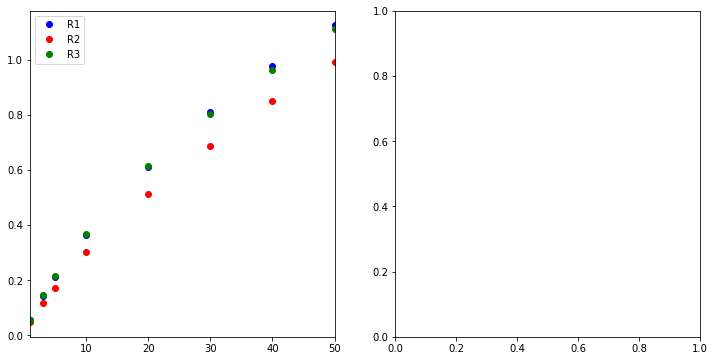

In [91]:
f_4, ax_4 = plt.subplots(1,2,figsize=(12,6))
#strategy1_df["sum"]["df_test"].plot(ax=ax_4[0],label="baseline", style="k-")
strategy4a_df["sum"]["df_test"].plot(ax=ax_4[0],label="R1", style="bo")
strategy4b_df["sum"]["df_test"].plot(ax=ax_4[0],label="R2", style="ro")
strategy4c_df["sum"]["df_test"].plot(ax=ax_4[0],label="R3", style="go")

#ax_4[1].plot(rec_items_list,100*(strategy4a_df["sum"]["df_test"]-strategy1_df["sum"]["df_test"])/strategy1_df["sum"]["df_test"],"bo",label="R1")
#ax_4[1].plot(rec_items_list,100*(strategy4b_df["sum"]["df_test"]-strategy1_df["sum"]["df_test"])/strategy1_df["sum"]["df_test"],"ro",label="R2")
#ax_4[1].plot(rec_items_list,100*(strategy4c_df["sum"]["df_test"]-strategy1_df["sum"]["df_test"])/strategy1_df["sum"]["df_test"],"go",label="R3")
#ax_4[1].legend();
#ax_4[1].axhline(0,color="k")

ax_4[0].legend();


We see that $R^{(1)}$ perform best, with at least 20% over the baseline...

In [ ]:
strategy4a_df["sum"]["df_test"].plot(ax=ax_test[0],label="best overlap", style="ko")
ax_test[0].legend();
ax_test[1].plot(rec_items_list,100*(strategy4a_df["sum"]["df_test"]-strategy1_df["sum"]["df_test"])/strategy1_df["sum"]["df_test"],"ko",label="best overlap")
ax_test[1].legend();
f_test

... and is also consistently better than all other strategies.


### Small variations

In [ ]:
#user_item_0=user_item/np.sqrt(((user_item.power(2)).sum(axis=1)))
user_item_0b=user_item/np.sqrt(((user_item.power(0)).sum(axis=1)))
item_item_b=(user_item_0b.T.dot(user_item_0b))
user_user_b=(user_item_0b.dot(user_item_0b.T))
#item_item[:4,:4]
#user_user[:4,:4]
#user_item_2=user_item**2
user_user_b[:4,:4]


In [ ]:
user_item_1b=np.array(user_user_b.dot(user_item_0b))
user_item_1b[:4,:4]

In [ ]:
def strategy_4d(u):
    """output=list of items index"""
    bare_list=list(user_item_1b[u-1].argsort()[::-1]+1)    #-1 because numpy starts from zero, index of users from 1
    #already_seen=set(df[df.user==u].item)
    #return([i for i in bare_list if i not in already_seen])
    return bare_list
strategy4d_df=validate_strategy(strategy_4d,verbose=True)  


In [ ]:
strategy4d_df["sum"]["df_test"].plot(ax=ax_4[0],label="different norm", style="yo")
ax_4[0].legend();
ax_4[1].plot(rec_items_list,100*(strategy4d_df["sum"]["df_test"]-strategy1_df["sum"]["df_test"])/strategy1_df["sum"]["df_test"],"yo",label="different norm")
ax_4[1].legend();
f_4

In [ ]:
#(RRt-1)R
user_item_10=np.array(user_item_1-user_item_0)
def strategy_4e(u):
    """output=list of items index"""
    bare_list=list(user_item_10[u-1].argsort()[::-1]+1)    #-1 because numpy starts from zero, index of users from 1
    already_seen=set(df[df.user==u].item)
    return([i for i in bare_list if i not in already_seen])
strategy4e_df=validate_strategy(strategy_4e,verbose=True) 

In [ ]:
strategy4e_df["sum"]["df_test"].plot(ax=ax_4[0],label="R1-R0", style="co")
ax_4[0].legend();
ax_4[1].plot(rec_items_list,100*(strategy4e_df["sum"]["df_test"]-strategy1_df["sum"]["df_test"])/strategy1_df["sum"]["df_test"],"co",label="R1-R0")
ax_4[1].legend();
f_4

In [ ]:
plt.matshow(np.array(item_item))

## FCP

In [ ]:
def fcp(strategy,verbose=False):
    nc_train=0
    nd_train=0
    nc_test=0
    nd_test=0
    if (verbose): u0=10
    for u in users.index: #[[0,]]:
        #print(u)
        items_sorted_index= np.array(strategy(u))
        if(verbose and u==u0): print("items_sorted_index first 20",items_sorted_index[:20])

        #train
        df_user_train=df[df["user"]==u]
        items_train=df_user_train.item
        est_ranking_train=np.zeros(len(items_train),dtype=int)
        for n,i in enumerate(items_train):
            #item i is at position est_ranking_train[n], where n is an index from 0 to the number of i's
            try:est_ranking_train[n]=np.where( items_sorted_index==i )[0][0]+1
            except:est_ranking_train[n]=len(items)
        true_rating_train=np.array(df_user_train.rating)
        est_ranking_train=est_ranking_train[:,np.newaxis]
        true_rating_train=true_rating_train[:,np.newaxis]
        nc_train+=np.array(np.logical_and(est_ranking_train<est_ranking_train.transpose() ,
                                          true_rating_train>true_rating_train.transpose()),dtype=int).sum()
        nd_train+=np.array(np.logical_and(est_ranking_train>est_ranking_train.transpose() ,
                                          true_rating_train>true_rating_train.transpose()),dtype=int).sum()

        #test            
        df_user_test= df_test[df_test["user"]==u]
        #print(df_user_test)
        items_test =list(df_user_test.item)
        if(verbose and u==u0): print("items_test_index",items_test)
        #est_ranking
        est_ranking_test=np.zeros(len(items_test),dtype=int)
        for n,i in enumerate(items_test):
            try:est_ranking_test[n]=np.where( items_sorted_index==i )[0][0]+1
            except:est_ranking_test[n]=len(items)
        if(verbose and u==u0): print("est_ranking_test",est_ranking_test)
        est_ranking_test=est_ranking_test[:,np.newaxis]
        if(verbose and u==u0): print(np.array(est_ranking_test<est_ranking_test.transpose(),dtype=int))
        #true_rating
        true_rating_test=np.array(df_user_test.rating)
        if(verbose and u==u0): print("true_rating_test",true_rating_test)
        true_rating_test=true_rating_test[:,np.newaxis]
        if(verbose and u==u0): print(np.array(true_rating_test>true_rating_test.transpose(),dtype=int))
        if(verbose and u==u0): print(np.array(np.logical_and(est_ranking_test<est_ranking_test.transpose() ,
                                         true_rating_test>true_rating_test.transpose()),dtype=int))
        if(verbose and u==u0): print(np.array(true_rating_test>true_rating_test.transpose(),dtype=int).sum())
        nc_test_u=np.array(np.logical_and(est_ranking_test<est_ranking_test.transpose() ,
                                         true_rating_test>true_rating_test.transpose()),dtype=int).sum()
        nc_test+=nc_test_u
        nd_test_u=np.array(np.logical_and(est_ranking_test>est_ranking_test.transpose(),
                                         true_rating_test>true_rating_test.transpose()),dtype=int).sum()
        nd_test+=nd_test_u
        if(verbose and u==u0): print("nc_test_u",nc_test_u)
        if(verbose and u==u0): print("nd_test_u",nd_test_u)

                        
    return (nc_train/(nc_train+nd_train),nc_test/(nc_test+nd_test))
                    
                    
        

In [ ]:
def strategy_r(u):
    """Returns random permutations of items"""
    return list(np.random.permutation(len(items)))

In [3]:
#fcp_train,fcp_test=fcp(strategy_2b)
#strategy_2b(1)
#est_ranking_train
#items_sorted_index= np.array(strategy_4a(u))
#np.where( items_sorted_index==i )[0][0]
#fcp_train,fcp_test
strategies_tot= (strategy_0,strategy_r,strategy_2a,strategy_2b,strategy_3a,strategy_3b,strategy_3c,strategy_3d,strategy_4a,strategy_4b,strategy_4c)
df_fcp=pd.DataFrame(index=[s.__name__ for s in strategies_tot],columns=["train","test"])
for s in strategies_tot:
    strategy_name=s.__name__
    fcp_train,fcp_test=fcp(s,verbose=False)
    print(strategy_name,fcp_train,fcp_test)
    df_fcp.loc[strategy_name,"train"]=fcp_train
    df_fcp.loc[strategy_name,"test"]=fcp_test

NameError: name 'strategy_0' is not defined

In [ ]:
# (_, _, true_r, est, _) in predictions]
#  u0, _, r0, est, _ in predictions
#predictions= (user,item,true_r,est_r,_)

In [ ]:
df_fcp.sort_values("test",ascending=False)

In [219]:
surprise.accuracy.mae??

In [ ]:
plt.matshow(np.array(item_item))



## Scikit-surprise

In [217]:
import surprise
surprise.accuracy.rmse??

In [182]:
algo4.predict()

TypeError: predict() missing 2 required positional arguments: 'uid' and 'iid'

In [8]:
from surprise import SVD
from surprise import Dataset
from surprise import evaluate, print_perf
from surprise.prediction_algorithms.random_pred import NormalPredictor
from surprise.prediction_algorithms.baseline_only import BaselineOnly

# Load the movielens-100k dataset (download it if needed),
# and split it into 3 folds for cross-validation.
data = Dataset.load_builtin('ml-100k')
data.split(n_folds=3)

In [ ]:
print(data.ratings_file)
data.raw_ratings[:4]



In [ ]:
!head /home/baruselli/.surprise_data/ml-100k/ml-100k/u.data
!ls /home/baruselli/.surprise_data/ml-100k/ml-100k


In [137]:
# We'll use the famous SVD algorithm.
algo = SVD()

# Evaluate performances of our algorithm on the dataset.
perf = evaluate(algo, data, measures=['RMSE', 'MAE','FCP'])

print_perf(perf)


Evaluating RMSE, MAE, FCP of algorithm SVD.

------------
Fold 1
RMSE: 0.9443
MAE:  0.7448
FCP:  0.6964
------------
Fold 2
RMSE: 0.9448
MAE:  0.7463
FCP:  0.7003
------------
Fold 3
RMSE: 0.9471
MAE:  0.7478
FCP:  0.6985
------------
------------
Mean RMSE: 0.9454
Mean MAE : 0.7463
Mean FCP : 0.6984
------------
------------
        Fold 1  Fold 2  Fold 3  Mean    
RMSE    0.9443  0.9448  0.9471  0.9454  
MAE     0.7448  0.7463  0.7478  0.7463  
FCP     0.6964  0.7003  0.6985  0.6984  


In [138]:
algo2 = NormalPredictor()

# Evaluate performances of our algorithm on the dataset.
perf2 = evaluate(algo2, data, measures=['RMSE', 'MAE','FCP'])

print_perf(perf2)

Evaluating RMSE, MAE, FCP of algorithm NormalPredictor.

------------
Fold 1
RMSE: 1.5227
MAE:  1.2211
FCP:  0.4984
------------
Fold 2
RMSE: 1.5240
MAE:  1.2253
FCP:  0.4930
------------
Fold 3
RMSE: 1.5143
MAE:  1.2166
FCP:  0.4916
------------
------------
Mean RMSE: 1.5204
Mean MAE : 1.2210
Mean FCP : 0.4944
------------
------------
        Fold 1  Fold 2  Fold 3  Mean    
RMSE    1.5227  1.5240  1.5143  1.5204  
MAE     1.2211  1.2253  1.2166  1.2210  
FCP     0.4984  0.4930  0.4916  0.4944  


In [139]:
algo3 = BaselineOnly()

# Evaluate performances of our algorithm on the dataset.
perf3 = evaluate(algo3, data, measures=['RMSE', 'MAE','FCP'])

print_perf(perf3)

Evaluating RMSE, MAE, FCP of algorithm BaselineOnly.

------------
Fold 1
Estimating biases using als...
RMSE: 0.9448
MAE:  0.7490
FCP:  0.7001
------------
Fold 2
Estimating biases using als...
RMSE: 0.9475
MAE:  0.7517
FCP:  0.7033
------------
Fold 3
Estimating biases using als...
RMSE: 0.9477
MAE:  0.7522
FCP:  0.7019
------------
------------
Mean RMSE: 0.9467
Mean MAE : 0.7510
Mean FCP : 0.7018
------------
------------
        Fold 1  Fold 2  Fold 3  Mean    
RMSE    0.9448  0.9475  0.9477  0.9467  
MAE     0.7490  0.7517  0.7522  0.7510  
FCP     0.7001  0.7033  0.7019  0.7018  


In [ ]:
algo2

In [ ]:
a=data.build_full_trainset()

In [ ]:
len(list(a.all_ratings()))

In [ ]:
len(data.raw_ratings)

In [ ]:
data.reader.indexes

In [ ]:
list(algo.trainset.all_ratings())[:4]

In [215]:
from surprise import AlgoBase
from surprise import Dataset
from surprise import evaluate
import numpy as np


class predict_item_mean(BaselineOnly):    #from baseline I have bu and bi (not strictly needed)

    def __init__(self):  BaselineOnly.__init__(self)

    def train(self, trainset):

        BaselineOnly.train(self, trainset)

        import scipy.sparse

        self._r=np.array([r for (u, i, r) in self.trainset.all_ratings()],dtype=int)
        self._u=np.array([u for (u, i, r) in self.trainset.all_ratings()],dtype=int)
        self._i=np.array([i for (u, i, r) in self.trainset.all_ratings()],dtype=int)
        #print(self._r)        #print(self._u)        #print(self._i)
        self.user_item=scipy.sparse.coo_matrix((self._r,(self._u,self._i))) #.to_csr()
    #awkward way to compute means as scipy.sparse has no obvious way to do it (the std method includes all the zeros)
    #mean for users
        self.user_sum=    self.user_item.sum(axis=1)
        self.user_count = (self.user_item!=0).sum(axis=1) #self.user_item.getnnz(axis=1) does not work
        self.user_mean= np.array((self.user_sum/ self.user_count)).flatten()
    #mean for items
        self.item_sum=   self.user_item.sum(axis=0)
        self.item_count =self.user_item.getnnz(axis=0)
        self.item_mean= np.array((self.item_sum/ self.item_count)).flatten()
    #global mean
        self.total_mean=self.user_sum.sum()/self.user_count.sum()
        #print(self.total_mean)
        #print(self.user_count)
        #print(self.user_sum)
        #print(self.user_mean.min(),self.user_mean.max())
        #print(self.item_mean.min(),self.item_mean.max())
        #print(self.user_item.shape)
        #print(self.user_mean.shape)
        #print(self.item_mean.shape)
        #print(self.item_mean)
        #print(self.user_item)
    
        

    def estimate(self, u, i):
        if self.trainset.knows_item(i):
#            return self.total_mean+self.bi[i]+self.bu[u]     #this is baseline
            return self.item_mean[i]+(self.user_mean[u]-self.total_mean)
        else:
#            return self.total_mean+self.bu[u] #baseline
            return self.total_mean+(self.user_mean[u]-self.total_mean) #baseline

        
        #      sum_means += np.mean([r for (_, r) in self.trainset.ir[i]])
      #      div += 1

  #      sum_means = self.trainset.global_mean
   #     div = 1

      #  if self.trainset.knows_user(u):
      #      sum_means += np.mean([r for (_, r) in self.trainset.ur[u]])
      #      div += 1
      #  if self.trainset.knows_item(i):
      #      sum_means += np.mean([r for (_, r) in self.trainset.ir[i]])
      #      div += 1

      #  return sum_means / div
    
    
    """def estimate(self, u, i):

        if not (self.trainset.knows_user(u) and self.trainset.knows_item(i)):
            raise PredictionImpossible('User and/or item is unkown.')

        # Compute similarities between u and v, where v describes all other
        # users that have also rated item i.
        neighbors = [(v, self.sim[u, v]) for (v, r) in self.trainset.ir[i]]
        # Sort these neighbors by similarity
        neighbors = sorted(neighbors, key=lambda x: x[1], reverse=True)

        print('The 3 nearest neighbors of user', str(u), 'are:')
        for v, sim_uv in neighbors[:3]:
            print('user {0:} with sim {1:1.2f}'.format(v, sim_uv))

        # ... Aaaaand return the baseline estimate anyway ;)
        bsl = self.trainset.global_mean + self.bu[u] + self.bi[i]
        return bsl"""
    
    
    
algo4 = predict_item_mean()
#algo4.train(algo4.trainset)
perf4 = evaluate(algo4, data, measures=['RMSE', 'MAE','FCP'])

print_perf(perf4)

AttributeError: 'predict_item_mean' object has no attribute 'trainset'

In [ ]:
algo4.trainset.
#algo4.total_mean

In [211]:
class predict_UR(predict_item_mean):     #I get user_item  sparse matrix from predict_item_mean

    def __init__(self):  predict_item_mean.__init__(self)

    def train(self, trainset):
        
        predict_item_mean.train(self, trainset)
        
        import scipy.sparse

        self.user_item_full=self.user_item.toarray()
        """self.user_item_0=scipy.sparse.coo_matrix(self.user_item/np.sqrt(((self.user_item.power(2)).sum(axis=1))))
        #self.item_item=(self.user_item_0.T.dot(self.user_item_0)).toarray()
        self.user_user=(self.user_item_0.dot(self.user_item_0.T)).toarray()
        #print(self.user_user)

        #self.user_item_1=np.array(self.user_user.dot(self.user_item_0.toarray()))
        self.user_item_1=np.array(self.user_user.dot(self.user_item_full))
        print(self.user_item_1.min(),self.user_item_1.max())"""
        
        
        self.RRtR=self.user_item_full.dot(self.user_item_full.transpose()).dot(self.user_item_full)
        """self.fu=np.sqrt((self.user_item_full**2).sum(axis=1))
        self.gj=np.sqrt((self.user_item_full**2).sum(axis=0))
        self.RRtR_n=(self.RRtR.transpose()/self.fu.transpose()).transpose()/self.gj
        print(self.RRtR_n.min(),self.RRtR_n.max())
        
        self.RRtR_n_max=self.RRtR_n.max()"""


    def estimate(self, u, i):
        if self.trainset.knows_item(i):
        #if self.trainset.knows_user(u):
        #    return self.item_mean[i]
        #else:
        #    return self.total_mean
            #return self.user_item_1[u,i]
            #return self.RRtR_n[u,i]
            return self.RRtR[u,i]
        else:
            #print(i)
            return 0
        #return 0

In [212]:
algo5 = predict_UR()
#algo4.train(data)
perf5=evaluate(algo5, data, measures=['FCP'])
print_perf(perf5)

Evaluating FCP of algorithm predict_UR.

------------
Fold 1
Estimating biases using als...
FCP:  0.1202
------------
Fold 2
Estimating biases using als...


KeyboardInterrupt: 

In [ ]:
from surprise import AlgoBase
from surprise import Dataset
from surprise import evaluate


class MyOwnAlgorithm(AlgoBase):

    def __init__(self):

        # Always call base method before doing anything.
        AlgoBase.__init__(self)

    def train(self, trainset):

        # Here again: call base method before doing anything.
        AlgoBase.train(self, trainset)

        # Compute the average rating. We might as well use the
        # trainset.global_mean attribute ;)
        self.the_mean = np.mean([r for (_, _, r) in                                 self.trainset.all_ratings()])

    def estimate(self, u, i):

        return self.the_mean


#data = Dataset.load_builtin('ml-100k')
algo = MyOwnAlgorithm()

evaluate(algo, data,measures=["fcp"])

In [221]:
def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


# First train an SVD algorithm on the movielens dataset.
data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()
algo = SVD()
algo.train(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

NameError: name 'defaultdict' is not defined

## jubakit

In [ ]:
from jubakit.classifier import Classifier, Schema, Dataset, Config
from jubakit.loader.csv import CSVLoader

# Load a CSV file.
#loader = CSVLoader('iris.csv')

# Define types for each column in the CSV file.
schema = Schema({
  'Species': Schema.LABEL,
}, Schema.NUMBER)

# Get the shuffled dataset.
dataset = Dataset(loader, schema).shuffle()

# Run the classifier service (`jubaclassifier` process).
classifier = Classifier.run(Config())

# Train the classifier.
for _ in classifier.train(dataset): pass

# Classify using the trained classifier.
for (idx, label, result) in classifier.classify(dataset):
  print("true label: {0}, estimated label: {1}".format(label, result[0][0]))

In [ ]:
len(items)

In [ ]:
import predictionio

In [ ]:
users


In [ ]:
data = Dataset.load_builtin('ml-100k')

In [ ]:
data.raw_ratings

In [ ]:
train1

In [ ]:
item_item[0]

## recsys

In [4]:
import sys
sys.path.append("/home/baruselli/Desktop/codata/python-recsys-master/recsys/")
sys.path.append("/home/baruselli/Desktop/codata/python-recsys-master/")
import recsys
#recsys.
#import recsys.algorithm
recsys.__file__

'/home/baruselli/Desktop/codata/python-recsys-master/recsys/__init__.py'

In [5]:
import recsys.algorithm
recsys.algorithm.VERBOSE = True

In [6]:
from recsys.algorithm.factorize import SVD
svd = SVD()
svd.load_data(filename='ml-100k/u1.base', sep='::', format={'col':0, 'row':1, 'value':2, 'ids': int})

ImportError: No module named 'csc'

## mrec